In [271]:
import numpy as np
import matplotlib.pyplot as plt

height = 5001
width = 5001
r=10
min_step_size=1
max_moves = 100000
greade_tree = 0
greade_move = 0
greade_toofar = 0

In [277]:
def point_generator(tree):
    center = np.mean(tree, axis=0)
    distances = np.sqrt(np.sum((tree - center)**2, axis=1))
    max_dist = np.max(distances)

    # Spawn on a circle outside the current tree
    radius = max_dist * 1.2+10
    angle = np.random.uniform(0, 2*np.pi)  # random angle every time

    y = int(center[0] + radius * np.sin(angle))
    x = int(center[1] + radius * np.cos(angle))

    return np.array([[y, x]])

def point_movement(point, min_step_size,min_distance):
        step_size = max(min_step_size, int(min_distance-(r)) )

        y, x = point[0] 
        angle = np.random.uniform(0, 2 * np.pi)
        dx = round(step_size * np.cos(angle))
        dy = round(step_size * np.sin(angle))
        new_y = y + dy
        new_x = x + dx
        new_point = np.array([[new_y, new_x]])  
        return new_point

In [273]:
canvas = np.zeros((width,height, 3), dtype=np.uint8)
canvas[:] = [50, 50, 155]

tree = np.array([[height//2, width//2],])

new_point = point_generator(tree)
too_far_threshold = 20 

In [274]:

for move_count in range(max_moves): 
    distance_to_tree = np.sqrt(np.sum((tree - new_point)**2, axis=1)) 

    if np.any(distance_to_tree <= r ): 
        tree = np.vstack([tree, new_point]) 
        greade_tree += 1

        # Recalculate thresholds dynamically
        center = np.mean(tree, axis=0) 
        distances = np.sqrt(np.sum((tree - center) ** 2, axis=1)) 
        max_dist = np.max(distances) 
        too_far_threshold = 40 + max_dist * 1.4

        # Spawn the next new point 
        new_point = point_generator(tree)  
        

    elif np.all(distance_to_tree > too_far_threshold):  
        new_point = point_generator(tree)
        greade_toofar += 1

    else: 
        min_distance = np.min(distance_to_tree)
        new_point = point_movement(new_point,min_step_size,min_distance) 
        greade_move += 1




4150 93498 2352


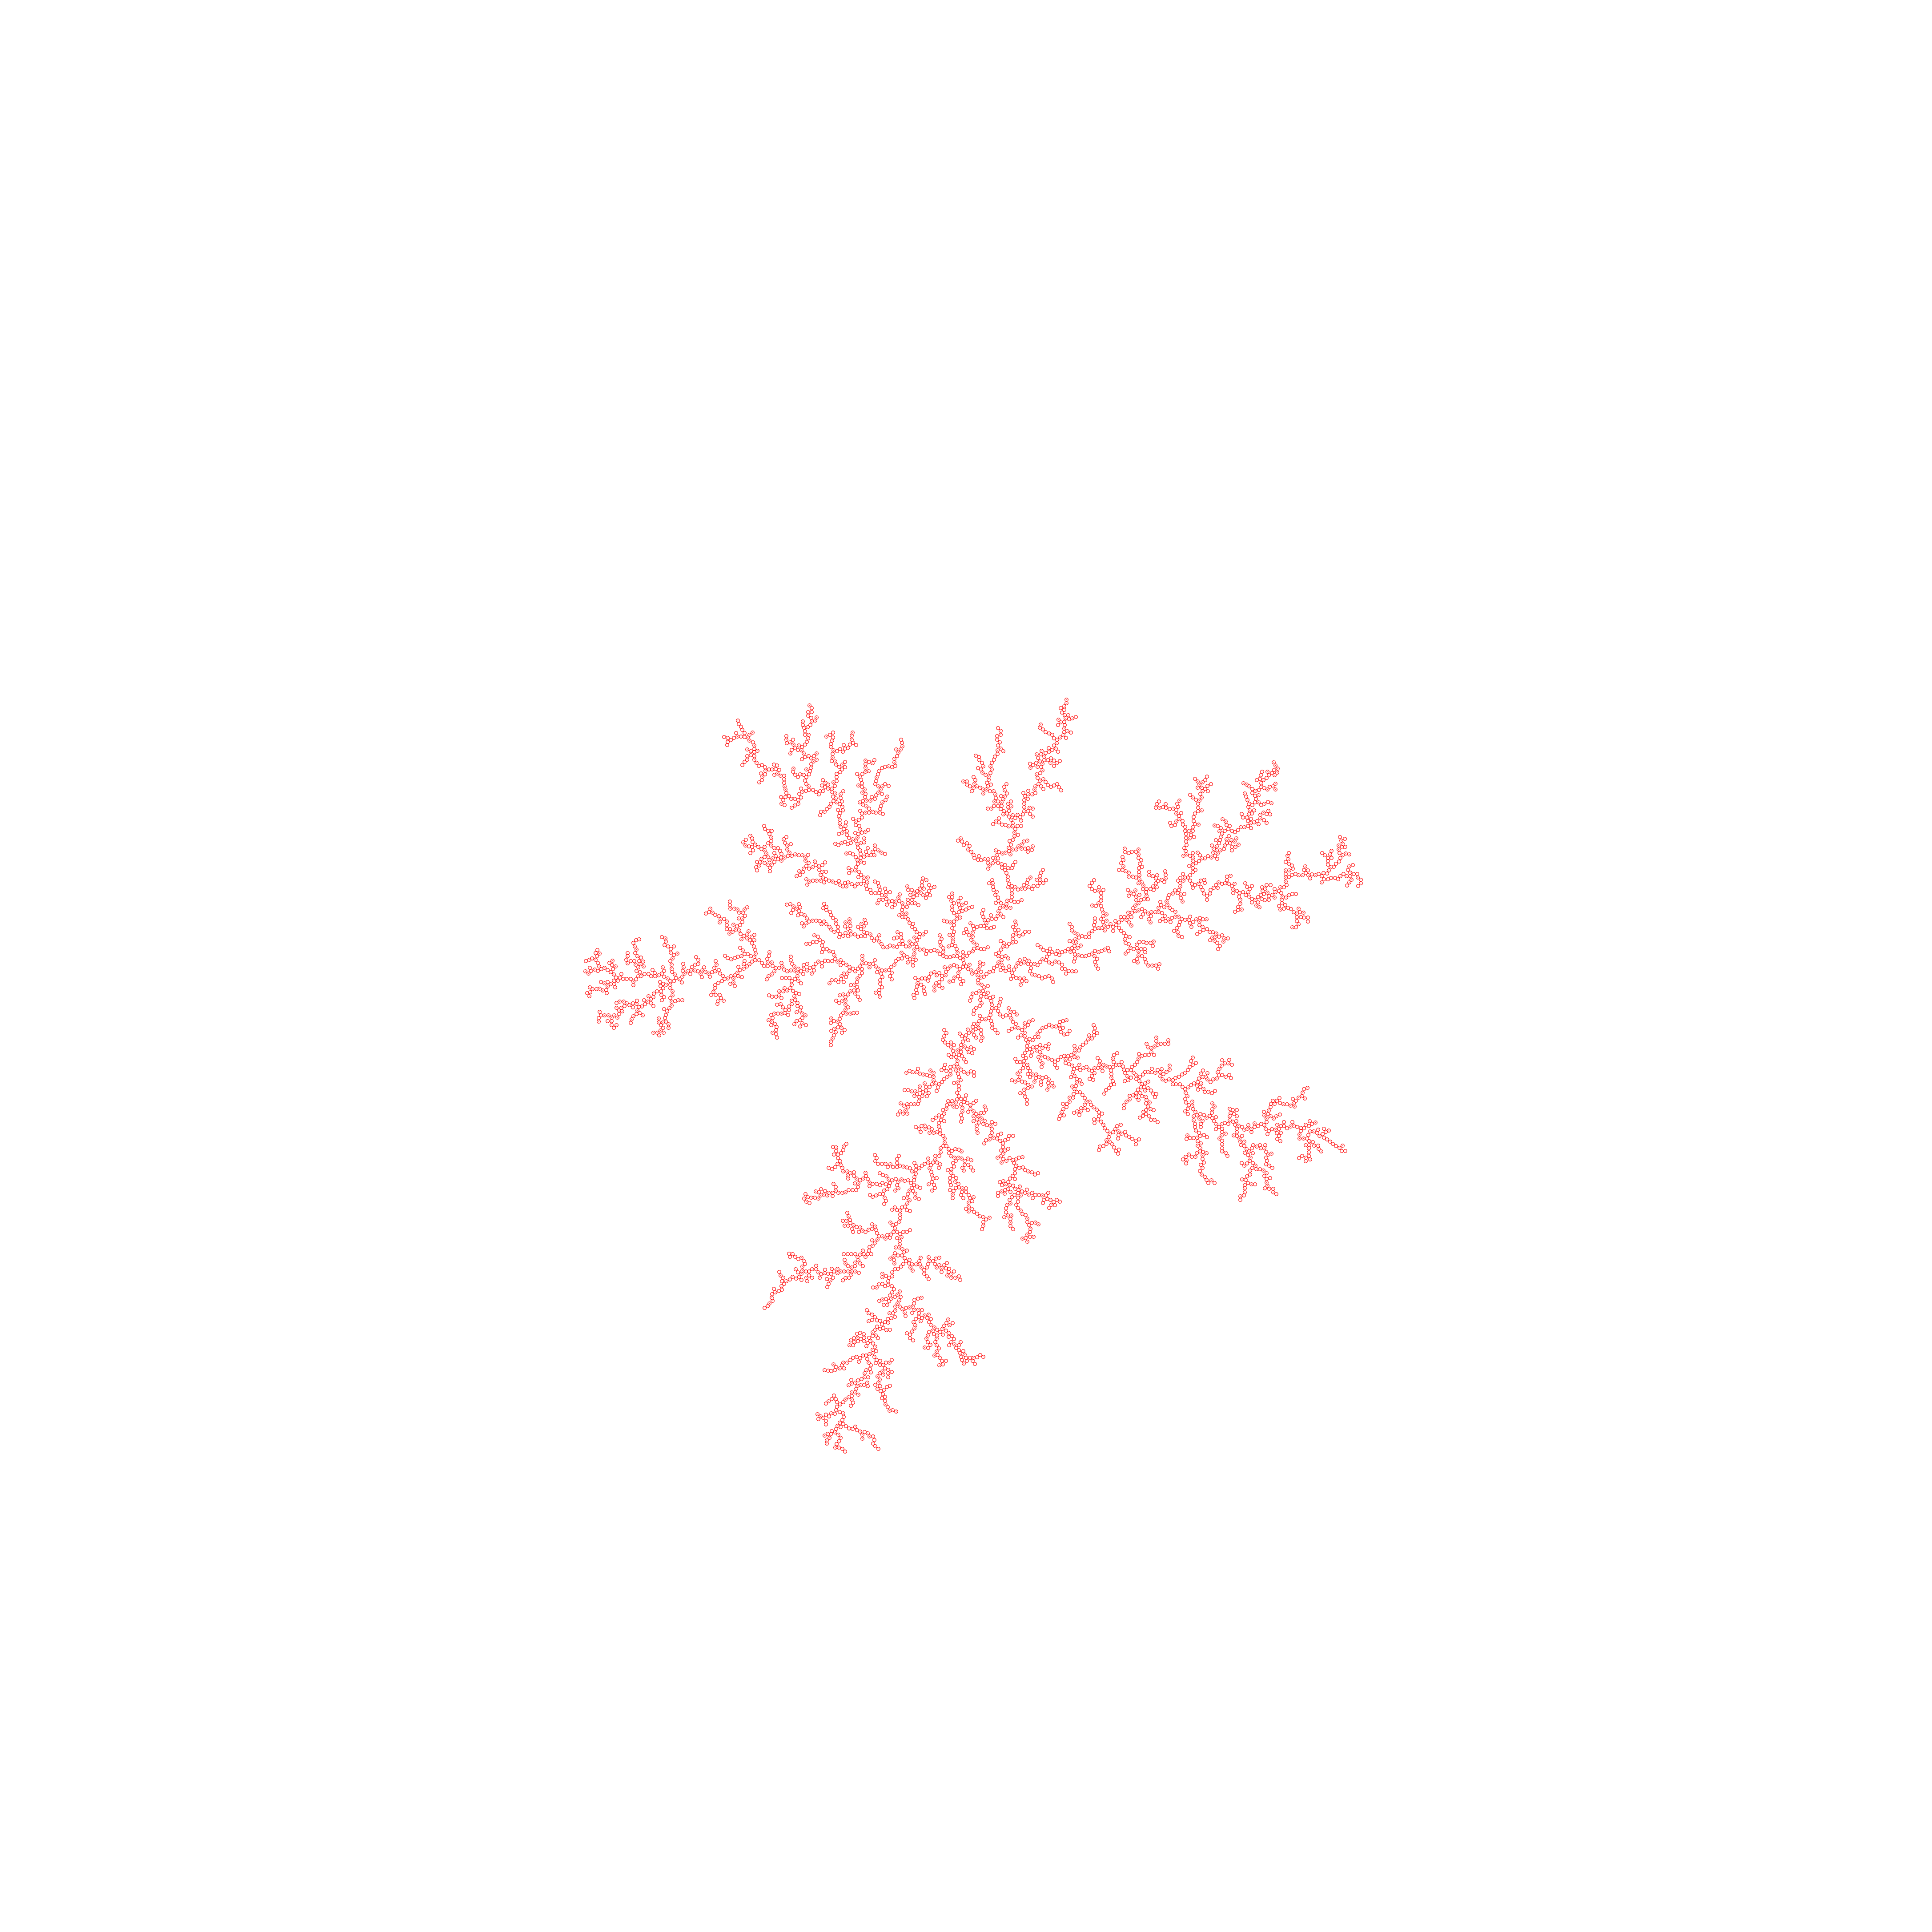

In [275]:
print(greade_tree, greade_move, greade_toofar)

S=0.02

plt.figure(figsize=(S*width/10, S*height/10), dpi=550)
plt.xlim(0, width)
plt.ylim(0, height)
plt.scatter(tree[:, 0], tree[:, 1], s=S, c='red', alpha=1)
plt.gca().set_aspect('equal')
plt.axis('off')
plt.show()

In [276]:

    Y, X = np.ogrid[:height, :width]
    print(greade_tree,
    greade_move,
    greade_toofar)

    for y, x in tree:
        mask = (X - x)**2 + (Y - y)**2 <= r**2
        canvas[mask] = [255, 0, 0]

    plt.figure(figsize=(10, 10), dpi=1000)
    plt.imshow(canvas)
    plt.title('Detailed High-Resolution Canvas')
    plt.axis('on')
    plt.show())

SyntaxError: unmatched ')' (4043729068.py, line 14)